### 1.0 Task Overview
The criminal justice system's effectiveness can be evaluated by analyzing conviction rates for various offenses. This project aims to leverage machine learning techniques to predict the likelihood of successful convictions for a particular offense being greater than or less than the number of unsuccessful convictions, using data from different quarters spanning 2015 to 2018. The dataset includes comprehensive information on multiple offense types, such as homicide, sexual offenses, robbery, theft, and fraud, detailing both successful and unsuccessful convictions and their respective percentages.

Our primary task involves creating a target label that indicates whether the number of successful convictions for a specific offense type is greater than or less than the number of unsuccessful convictions. By conducting thorough exploratory data analysis (EDA), we will examine the distribution and trends of each variable individually and explore the relationships and correlations between all variables collectively. This will help us uncover significant patterns and dependencies that are crucial for accurate predictions.

Following EDA, we will perform feature engineering and selection, focusing on identifying the most relevant features that strongly correlate with the target variable. These features will be used to train machine learning models aimed at predicting successful convictions. The classification task involves labeling each row based on whether the number of successful convictions for that offense exceeds or falls below the number of unsuccessful convictions, enabling us to forecast trends and outcomes in criminal convictions effectively. By following this structured approach, we aim to derive meaningful insights from the data and develop robust predictive models to enhance the decision-making process within the criminal justice system.

### 1.1 Data Loading and Overview

The crime data used in this analysis is sourced from the Crown Prosecution Service (CPS) UK publication on case outcomes by principal offence category. The dataset spans from 2015 to 2018 and comprises multiple quarterly reports detailing case outcomes in magistrates' courts and the Crown Court.

The datasets to be merged include:

1. 2018 Case Outcomes data (Quarter 1 to Quarter 4)
2. 2017 Case Outcomes data (Quarter 1 to Quarter 4)
2. 2016 Case Outcomes data (Quarter 1 to Quarter 4)
3. 2015 Case Outcomes data (Quarter 1 to Quarter 4)

These quarterly recordings provide a comprehensive view of CPS proceedings over the years, allowing for detailed analysis and modeling to predict criminal outcomes.

In [1]:
# Installing all necessary libraries for data exploration and manipulation

!pip install panda
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [152]:
# IMPORTING LIBRARIES

# Data Manipulations
import pandas as pd
import numpy as np
import os


# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
# LOADING THE DATA


# Reading the data directory and file name
data_folder = "DATA"  
data_file = "POC-15-16-q1.csv" 

# Construct the full path to the data file
data_path = os.path.join(data_folder, data_file)

# Load the data using the pandas library 
data = pd.read_csv(data_path)

#quick view
data.head()

,Unnamed: 0,Number of Homicide Convictions,Percentage of Homicide Convictions,Number of Homicide Unsuccessful,Percentage of Homicide Unsuccessful,Number of Offences Against The Person Convictions,Percentage of Offences Against The Person Convictions,Number of Offences Against The Person Unsuccessful,Percentage of Offences Against The Person Unsuccessful,Number of Sexual Offences Convictions,...,Number of All Other Offences (excluding Motoring) Convictions,Percentage of All Other Offences (excluding Motoring) Convictions,Number of All Other Offences (excluding Motoring) Unsuccessful,Percentage of All Other Offences (excluding Motoring) Unsuccessful,Number of Motoring Offences Convictions,Percentage of Motoring Offences Convictions,Number of Motoring Offences Unsuccessful,Percentage of Motoring Offences Unsuccessful,Number of Admin Finalised Unsuccessful,Percentage of Admin Finalised Unsuccessful
0,National,219,82.60%,46,17.40%,"29,338",75.30%,"9,645",24.70%,"2,669",...,"5,419",84.50%,996,15.50%,"23,946",84.70%,"4,336",15.30%,"2,222",100.00%
1,Avon and Somerset,14,93.30%,1,6.70%,752,76.60%,230,23.40%,133,...,157,84.40%,29,15.60%,639,83.00%,131,17.00%,94,100.00%
2,Bedfordshire,2,100.00%,0,0.00%,260,73.70%,93,26.30%,14,...,48,76.20%,15,23.80%,199,88.10%,27,11.90%,33,100.00%
3,Cambridgeshire,1,100.00%,0,0.00%,316,79.60%,81,20.40%,18,...,37,88.10%,5,11.90%,267,88.10%,36,11.90%,31,100.00%
4,Cheshire,2,100.00%,0,0.00%,619,81.70%,139,18.30%,61,...,144,88.30%,19,11.70%,442,88.60%,57,11.40%,29,100.00%


The crime data shown consists of quarterly recorded outcomes from the Crown Prosecution Service (CPS) UK publication on case outcomes by principal offence category. Each dataset covers the same number of rows and columns, with identical features across different quarters

Before merging the data from multiple CSV files, it's essential to enhance each dataset by adding two crucial columns: 'Year' and 'Quarter'. These columns provide temporal context to the data, aiding in analysis and understanding of trends over time.

To achieve this, we first parse each file's name to extract the relevant temporal information. For instance, if a file is named 'POC-18-19-q4.csv', the 'Year' column would capture the first year mentioned ('18' in this case), and the 'Quarter' column would denote the specific quarter ('q4').

By systematically adding these columns to each dataset prior to merging, we ensure that all subsequent analyses benefit from clear temporal segmentation. 

In [154]:

def get_data_files(data_dir):
    """
    Gets a list of all CSV files within a directory.

    Args:
        data_dir (str): Path to the data directory.

    Returns:
        list: List of filenames (excluding non-CSV files).
    """
    data_files = []
    for filename in os.listdir(data_dir):
        if filename.endswith(".csv"):
            data_files.append(filename)
    return data_files


def load_data(data_dir, filename):
    """
    Loads data from a CSV file into a pandas dataframe.

    Args:
        data_dir (str): Path to the data directory.
        filename (str): Name of the CSV file.

    Returns:
        pd.DataFrame: Dataframe loaded from the CSV file.
    """
    filepath = os.path.join(data_dir, filename)
    return pd.read_csv(filepath)


def add_time_columns(df, year, quarter):
    """
    Adds 'Year' and 'Quarter' columns to a dataframe.

    Args:
        df (pd.DataFrame): Dataframe to add columns to.
        year (int): Year to assign to all rows.
        quarter (str): Quarter to assign to all rows.

    Returns:
        pd.DataFrame: Dataframe with added columns.
    """
    df['Year'] = year
    df['Quarter'] = quarter
    return df


def add_year_and_quarter_columns(data_dir):
    """
    Adds 'Year' and 'Quarter' columns to all dataframes in a directory based on filename format.

    Args:
        data_dir (str): Path to the data directory.

    Returns:
        dict: Dictionary containing dataframes with added columns.
    """
    data_files = get_data_files(data_dir)
    dataframes = {}
    
    for filename in data_files:
        
        # Extract year and quarter from filename 'POC-18-19-q4'
        parts = filename.split('-')
        year = int(parts[1].split('_')[0])
        quarter = parts[-1].split('.')[0]
        
        # Load data and add columns
        df = load_data(data_dir, filename)
        df = add_time_columns(df, year, quarter)
        
        # Store dataframe in dictionary
        dataframes[filename] = df
    
    return dataframes

In [156]:
#  Adding the changes to the diffrent data and storing the new data in a dictionary 
data_dir = "DATA"
dataframes_with_time_columns = add_year_and_quarter_columns(data_dir)

Now merging all this datasets in the 'dataframes_with_time_columns' dictionary 

In [157]:
# MERGING ALL THE DATAFRAMES INTO ONE 

# Combine all dataframes into a single dataframe
CPS_Data_Merged = pd.concat(dataframes_with_time_columns.values(), ignore_index=True)

# Loading the Merged data
CPS_Data_Merged

,Unnamed: 0,Number of Homicide Convictions,Percentage of Homicide Convictions,Number of Homicide Unsuccessful,Percentage of Homicide Unsuccessful,Number of Offences Against The Person Convictions,Percentage of Offences Against The Person Convictions,Number of Offences Against The Person Unsuccessful,Percentage of Offences Against The Person Unsuccessful,Number of Sexual Offences Convictions,...,Percentage of All Other Offences (excluding Motoring) Unsuccessful,Number of Motoring Offences Convictions,Percentage of Motoring Offences Convictions,Number of Motoring Offences Unsuccessful,Percentage of Motoring Offences Unsuccessful,Number of Admin Finalised Unsuccessful,Percentage of Admin Finalised Unsuccessful,Year,Quarter,Percentage of L Motoring Offences Unsuccessful
0,National,219,82.60%,46,17.40%,"29,338",75.30%,"9,645",24.70%,"2,669",...,15.50%,"23,946",84.70%,"4,336",15.30%,"2,222",100.00%,15,q1,NaN
1,Avon and Somerset,14,93.30%,1,6.70%,752,76.60%,230,23.40%,133,...,15.60%,639,83.00%,131,17.00%,94,100.00%,15,q1,NaN
2,Bedfordshire,2,100.00%,0,0.00%,260,73.70%,93,26.30%,14,...,23.80%,199,88.10%,27,11.90%,33,100.00%,15,q1,NaN
3,Cambridgeshire,1,100.00%,0,0.00%,316,79.60%,81,20.40%,18,...,11.90%,267,88.10%,36,11.90%,31,100.00%,15,q1,NaN
4,Cheshire,2,100.00%,0,0.00%,619,81.70%,139,18.30%,61,...,11.70%,442,88.60%,57,11.40%,29,100.00%,15,q1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,Warwickshire,8,88.9%,1,11.1%,168,82.8%,35,17.2%,15,...,22.2%,205,79.8%,52,20.2%,23,NaN,18,q4,100.0%
684,West Mercia,5,100.0%,0,0.0%,490,83.1%,100,16.9%,45,...,2.5%,582,90.4%,62,9.6%,43,NaN,18,q4,100.0%
685,West Midlands,21,75.0%,7,25.0%,1801,82.3%,387,17.7%,146,...,18.5%,894,92.0%,78,8.0%,238,NaN,18,q4,100.0%
686,West Yorkshire,10,90.9%,1,9.1%,1231,78.5%,338,21.5%,170,...,25.0%,1209,75.5%,392,24.5%,153,NaN,18,q4,100.0%


In the interest of clarity and relevance, the initial unnamed column in the dataframe is being renamed to "UK Region." This change effectively denotes the data's focus on the UK, aligning with its intended use in CPS reports and broader contexts.

In [7]:
# Rename the initial column to 'UK Region'
CPS_Data_Merged = CPS_Data_Merged.copy()  # Make a copy to avoid modifying the original
CPS_Data_Merged.rename(columns={CPS_Data_Merged.columns[0]: 'UK Region'}, inplace=True)

# Confirming the Modification of the first column
CPS_Data_Merged.columns.tolist()

['UK Region',
 'Number of Homicide Convictions',
 'Percentage of Homicide Convictions',
 'Number of Homicide Unsuccessful',
 'Percentage of Homicide Unsuccessful',
 'Number of Offences Against The Person Convictions',
 'Percentage of Offences Against The Person Convictions',
 'Number of Offences Against The Person Unsuccessful',
 'Percentage of Offences Against The Person Unsuccessful',
 'Number of Sexual Offences Convictions',
 'Percentage of Sexual Offences Convictions',
 'Number of Sexual Offences Unsuccessful',
 'Percentage of Sexual Offences Unsuccessful',
 'Number of Burglary Convictions',
 'Percentage of Burglary Convictions',
 'Number of Burglary Unsuccessful',
 'Percentage of Burglary Unsuccessful',
 'Number of Robbery Convictions',
 'Percentage of Robbery Convictions',
 'Number of Robbery Unsuccessful',
 'Percentage of Robbery Unsuccessful',
 'Number of Theft And Handling Convictions',
 'Percentage of Theft And Handling Convictions',
 'Number of Theft And Handling Unsuccessfu

we proceed to performing the Exploratory data analysis on the data for better understanding of the contents and the 

### 2.0 EXPLORATORY DATA ANALYSIS


   Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It involves examining the main characteristics of the data, often using visual methods. EDA helps to uncover patterns, spot anomalies, frame hypotheses, and check assumptions. In this notebook, we will perform EDA on our merged dataset, which consists of various criminal convictions and unsuccessful attempts recorded by the Crown Prosecution Service (CPS) UK from 2015 to 2018. Our goal is to gain a deeper understanding of the data by analyzing its structure, distribution, and relationships between different variables. We will start by inspecting the basic properties of the data, such as column names, data types, and summary statistics. Then, we will visualize key aspects using histograms and scatter plots. This comprehensive analysis will lay the foundation for further statistical analysis and machine learning modeling.

In [8]:
# Basic Information About the DataFrame
CPS_Data_Merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 54 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   UK Region                                                           688 non-null    object
 1   Number of Homicide Convictions                                      688 non-null    int64 
 2   Percentage of Homicide Convictions                                  688 non-null    object
 3   Number of Homicide Unsuccessful                                     688 non-null    int64 
 4   Percentage of Homicide Unsuccessful                                 688 non-null    object
 5   Number of Offences Against The Person Convictions                   688 non-null    object
 6   Percentage of Offences Against The Person Convictions               688 non-null    object
 7   Number of Offences Against

The `CPS_Data_Merged` DataFrame contains detailed information about various criminal offences and their outcomes across different regions in the UK. Below is an explanation of each column in the DataFrame:

1. **UK Region**: This column specifies the region within the UK to which the data pertains. It provides a geographic context for the recorded data, making it easier to analyze trends and patterns regionally. The "National" entry in the UK Region column aggregates the totals from all other regions for the corresponding quarter

2. **Number of Homicide Convictions**: Represents the total number of successful convictions for homicide cases within the specified period.

3. **Percentage of Homicide Convictions**: Shows the percentage of convictions out of the total homicide cases.

4. **Number of Homicide Unsuccessful**: Indicates the number of homicide cases that did not result in a conviction.

5. **Percentage of Homicide Unsuccessful**: Represents the percentage of unsuccessful outcomes in homicide cases.

6. **Number of Offences Against The Person Convictions**: Refers to the number of successful convictions for offences against the person, such as assault or battery.

7. **Percentage of Offences Against The Person Convictions**: Displays the percentage of convictions out of the total offences against the person cases.

8. **Number of Offences Against The Person Unsuccessful**: Indicates the number of unsuccessful outcomes for offences against the person.

9. **Percentage of Offences Against The Person Unsuccessful**: Shows the percentage of unsuccessful outcomes in offences against the person cases.

10. **Number of Sexual Offences Convictions**: The total number of successful convictions for sexual offences.

11. **Percentage of Sexual Offences Convictions**: Represents the percentage of sexual offences that resulted in convictions.

12. **Number of Sexual Offences Unsuccessful**: Indicates the number of sexual offence cases that did not lead to convictions.

13. **Percentage of Sexual Offences Unsuccessful**: Shows the percentage of unsuccessful sexual offence cases.

14. **Number of Burglary Convictions**: The total number of successful convictions for burglary cases.

15. **Percentage of Burglary Convictions**: Represents the percentage of burglary cases that resulted in convictions.

16. **Number of Burglary Unsuccessful**: Indicates the number of unsuccessful outcomes in burglary cases.

17. **Percentage of Burglary Unsuccessful**: Shows the percentage of unsuccessful burglary cases.

18. **Number of Robbery Convictions**: The total number of successful convictions for robbery cases.

19. **Percentage of Robbery Convictions**: Represents the percentage of robbery cases that resulted in convictions.

20. **Number of Robbery Unsuccessful**: Indicates the number of unsuccessful outcomes in robbery cases.

21. **Percentage of Robbery Unsuccessful**: Shows the percentage of unsuccessful robbery cases.

22. **Number of Theft And Handling Convictions**: Refers to the number of successful convictions for theft and handling cases.

23. **Percentage of Theft And Handling Convictions**: Displays the percentage of convictions out of the total theft and handling cases.

24. **Number of Theft And Handling Unsuccessful**: Indicates the number of unsuccessful outcomes for theft and handling cases.

25. **Percentage of Theft And Handling Unsuccessful**: Shows the percentage of unsuccessful outcomes in theft and handling cases.

26. **Number of Fraud And Forgery Convictions**: The total number of successful convictions for fraud and forgery cases.

27. **Percentage of Fraud And Forgery Convictions**: Represents the percentage of fraud and forgery cases that resulted in convictions.

28. **Number of Fraud And Forgery Unsuccessful**: Indicates the number of unsuccessful outcomes in fraud and forgery cases.

29. **Percentage of Fraud And Forgery Unsuccessful**: Shows the percentage of unsuccessful fraud and forgery cases.

30. **Number of Criminal Damage Convictions**: The total number of successful convictions for criminal damage cases.

31. **Percentage of Criminal Damage Convictions**: Represents the percentage of criminal damage cases that resulted in convictions.

32. **Number of Criminal Damage Unsuccessful**: Indicates the number of unsuccessful outcomes in criminal damage cases.

33. **Percentage of Criminal Damage Unsuccessful**: Shows the percentage of unsuccessful criminal damage cases.

34. **Number of Drugs Offences Convictions**: Refers to the number of successful convictions for drug-related offences.

35. **Percentage of Drugs Offences Convictions**: Displays the percentage of convictions out of the total drug-related offences.

36. **Number of Drugs Offences Unsuccessful**: Indicates the number of unsuccessful outcomes for drug-related offences.

37. **Percentage of Drugs Offences Unsuccessful**: Shows the percentage of unsuccessful outcomes in drug-related offences.

38. **Number of Public Order Offences Convictions**: The total number of successful convictions for public order offences.

39. **Percentage of Public Order Offences Convictions**: Represents the percentage of public order offences that resulted in convictions.

40. **Number of Public Order Offences Unsuccessful**: Indicates the number of unsuccessful outcomes in public order offences.

41. **Percentage of Public Order Offences Unsuccessful**: Shows the percentage of unsuccessful public order offences.

42. **Number of All Other Offences (excluding Motoring) Convictions**: Refers to the number of successful convictions for all other offences excluding motoring offences.

43. **Percentage of All Other Offences (excluding Motoring) Convictions**: Displays the percentage of convictions out of the total other offences excluding motoring.

44. **Number of All Other Offences (excluding Motoring) Unsuccessful**: Indicates the number of unsuccessful outcomes for other offences excluding motoring.

45. **Percentage of All Other Offences (excluding Motoring) Unsuccessful**: Shows the percentage of unsuccessful outcomes in other offences excluding motoring.

46. **Number of Motoring Offences Convictions**: The total number of successful convictions for motoring offences.

47. **Percentage of Motoring Offences Convictions**: Represents the percentage of motoring offences that resulted in convictions.

48. **Number of Motoring Offences Unsuccessful**: Indicates the number of unsuccessful outcomes in motoring offences.

49. **Percentage of Motoring Offences Unsuccessful**: Shows the percentage of unsuccessful motoring offences.

50. **Number of Admin Finalised Unsuccessful**: Refers to the number of administrative cases that were concluded unsuccessfully.

51. **Percentage of Admin Finalised Unsuccessful**: Represents the percentage of unsuccessful administrative cases.

52. **Year**: Indicates the year in which the data was recorded.

53. **Quarter**: Specifies the quarter (e.g., Q1, Q2, Q3, Q4) in which the data was recorded.

54. **Percentage of L Motoring Offences Unsuccessful**: Represents the percentage of unsuccessful outcomes in "L" motoring offences, with this category likely being specific to a certain classification within motoring offences.

In [9]:
# Get the number of rows and columns
num_rows, num_columns = CPS_Data_Merged.shape
print(f'The dataset contains {num_rows} rows and {num_columns} columns.')

The dataset contains 688 rows and 54 columns.


In [10]:
# Check for missing values in the DataFrame
missing_values = CPS_Data_Merged.isnull().sum()
print(missing_values)

UK Region                                                               0
Number of Homicide Convictions                                          0
Percentage of Homicide Convictions                                      0
Number of Homicide Unsuccessful                                         0
Percentage of Homicide Unsuccessful                                     0
Number of Offences Against The Person Convictions                       0
Percentage of Offences Against The Person Convictions                   0
Number of Offences Against The Person Unsuccessful                      0
Percentage of Offences Against The Person Unsuccessful                  0
Number of Sexual Offences Convictions                                   0
Percentage of Sexual Offences Convictions                               0
Number of Sexual Offences Unsuccessful                                  0
Percentage of Sexual Offences Unsuccessful                              0
Number of Burglary Convictions        

The columns with missing values in the dataset are crucial to understand. The Percentage of Admin Finalised Unsuccessful column has 43 missing values, which represents the percentage of administrative cases that concluded unsuccessfully. The presence of these missing values suggests that for some regions or time periods, this data was either not recorded or not available. On the other hand, the Percentage of L Motoring Offences Unsuccessful column has a significantly higher number of missing values, totaling 645. This column indicates the percentage of "L" classified motoring offences that were unsuccessful. The substantial amount of missing data in this column could imply that this category is either newly introduced, not uniformly recorded, or not applicable to most regions or periods covered in the dataset.

To address the missing values in our dataset, we will remove the two columns with missing values: Percentage of Admin Finalised Unsuccessful and Percentage of L Motoring Offences Unsuccessful. This decision is justified because these columns have a significant number of missing values, which could introduce bias or inaccuracies if filled arbitrarily. 

In [11]:
# Remove columns with missing values
columns_to_drop = ['Percentage of Admin Finalised Unsuccessful', 'Percentage of L Motoring Offences Unsuccessful']
CPS_Data_Merged.drop(columns=columns_to_drop, inplace=True)


In [12]:
# checking the datatypes for each feature
data_types = CPS_Data_Merged.dtypes
print(data_types)

UK Region                                                             object
Number of Homicide Convictions                                         int64
Percentage of Homicide Convictions                                    object
Number of Homicide Unsuccessful                                        int64
Percentage of Homicide Unsuccessful                                   object
Number of Offences Against The Person Convictions                     object
Percentage of Offences Against The Person Convictions                 object
Number of Offences Against The Person Unsuccessful                    object
Percentage of Offences Against The Person Unsuccessful                object
Number of Sexual Offences Convictions                                 object
Percentage of Sexual Offences Convictions                             object
Number of Sexual Offences Unsuccessful                                object
Percentage of Sexual Offences Unsuccessful                            object

We observed that certain features, meant to be integers, are currently in object format. We will convert these to integers, and additionally, parse percentage values into integers for uniformity across the dataset.

In [13]:
# Define a function to convert percentage strings to integers
def percentage_to_int(percent_str):
    if isinstance(percent_str, str):
        return int(percent_str.strip('%'))  # Remove '%' and convert to integer
    else:
        return percent_str  # Return as-is if not a string

# List of columns to convert to integers
columns_to_convert = CPS_Data_Merged.columns.drop(['UK Region', 'Year', 'Quarter'])

# Convert object columns to integers
for col in columns_to_convert:
    if CPS_Data_Merged[col].dtype == 'object':
        CPS_Data_Merged[col] = pd.to_numeric(CPS_Data_Merged[col].str.replace('%', ''), errors='coerce').fillna(0).astype(int)

# Display data types after conversion
data_types_after_conversion = CPS_Data_Merged.dtypes
print(data_types_after_conversion)


UK Region                                                             object
Number of Homicide Convictions                                         int64
Percentage of Homicide Convictions                                     int32
Number of Homicide Unsuccessful                                        int64
Percentage of Homicide Unsuccessful                                    int32
Number of Offences Against The Person Convictions                      int32
Percentage of Offences Against The Person Convictions                  int32
Number of Offences Against The Person Unsuccessful                     int32
Percentage of Offences Against The Person Unsuccessful                 int32
Number of Sexual Offences Convictions                                  int32
Percentage of Sexual Offences Convictions                              int32
Number of Sexual Offences Unsuccessful                                 int32
Percentage of Sexual Offences Unsuccessful                             int32

We examined the unique values present in the "UK Region" column of our dataset. This allows us to understand the specific regions represented in our data, providing insight into geographic coverage and potential regional variations in criminal offence outcomes.

In [14]:
# Display unique values in the 'UK Region' column
unique_regions = CPS_Data_Merged['UK Region'].unique()
print(unique_regions)
print(' ')
print('Length of unique regions')
print(len(unique_regions))

['National' 'Avon and Somerset' 'Bedfordshire' 'Cambridgeshire' 'Cheshire'
 'Cleveland' 'Cumbria' 'Derbyshire' 'Devon and Cornwall' 'Dorset' 'Durham'
 'Dyfed Powys' 'Essex' 'Gloucestershire' 'GreaterManchester' 'Gwent'
 'Hampshire' 'Hertfordshire' 'Humberside' 'Kent' 'Lancashire'
 'Leicestershire' 'Lincolnshire' 'Merseyside' 'Metropolitan and City'
 'Norfolk' 'Northamptonshire' 'Northumbria' 'North Wales'
 'North Yorkshire' 'Nottinghamshire' 'South Wales' 'South Yorkshire'
 'Staffordshire' 'Suffolk' 'Surrey' 'Sussex' 'Thames Valley'
 'Warwickshire' 'West Mercia' 'West Midlands' 'West Yorkshire' 'Wiltshire']
 
Length of unique regions
43


In [15]:
region_counts = CPS_Data_Merged['UK Region'].value_counts()
region_list = []

for region, count in region_counts.items():
    region_list.append(f"{region}: {count}")

# Print the list
print(region_list)


['National: 16', 'South Yorkshire: 16', 'Metropolitan and City: 16', 'Norfolk: 16', 'Northamptonshire: 16', 'Northumbria: 16', 'North Wales: 16', 'North Yorkshire: 16', 'Nottinghamshire: 16', 'South Wales: 16', 'Staffordshire: 16', 'Lincolnshire: 16', 'Suffolk: 16', 'Surrey: 16', 'Sussex: 16', 'Thames Valley: 16', 'Warwickshire: 16', 'West Mercia: 16', 'West Midlands: 16', 'West Yorkshire: 16', 'Merseyside: 16', 'Leicestershire: 16', 'Avon and Somerset: 16', 'Durham: 16', 'Bedfordshire: 16', 'Cambridgeshire: 16', 'Cheshire: 16', 'Cleveland: 16', 'Cumbria: 16', 'Derbyshire: 16', 'Devon and Cornwall: 16', 'Dorset: 16', 'Dyfed Powys: 16', 'Lancashire: 16', 'Essex: 16', 'Gloucestershire: 16', 'GreaterManchester: 16', 'Gwent: 16', 'Hampshire: 16', 'Hertfordshire: 16', 'Humberside: 16', 'Kent: 16', 'Wiltshire: 16']


In the combined dataset, the "National" entry in the UK Region column aggregates the totals from all other regions for the corresponding quarter. therefore To perform summary statistics on all numerical columns, we exclude rows where the UK Region is "National"

In [16]:
# Function to check if column name starts with 'Percentage'
def is_percentage_column(column_name):
    return column_name.startswith('Percentage')

# Filter out percentage columns and 'Year'
numerical_columns = CPS_Data_Merged.select_dtypes(include=['int64', 'int32']).drop(columns=['Year'])

# Filter rows where UK Region is not 'National'
CPS_Data_filtered_data = numerical_columns[CPS_Data_Merged['UK Region'] != 'National']

# Filter out percentage columns
CPS_Data_filtered_data = CPS_Data_filtered_data.loc[:, ~CPS_Data_filtered_data.columns.map(is_percentage_column)]

# Display summary statistics for numerical columns
CPS_Data_filtered_data.describe()

,Number of Homicide Convictions,Number of Homicide Unsuccessful,Number of Offences Against The Person Convictions,Number of Offences Against The Person Unsuccessful,Number of Sexual Offences Convictions,Number of Sexual Offences Unsuccessful,Number of Burglary Convictions,Number of Burglary Unsuccessful,Number of Robbery Convictions,Number of Robbery Unsuccessful,...,Number of Criminal Damage Unsuccessful,Number of Drugs Offences Convictions,Number of Drugs Offences Unsuccessful,Number of Public Order Offences Convictions,Number of Public Order Offences Unsuccessful,Number of All Other Offences (excluding Motoring) Convictions,Number of All Other Offences (excluding Motoring) Unsuccessful,Number of Motoring Offences Convictions,Number of Motoring Offences Unsuccessful,Number of Admin Finalised Unsuccessful
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,...,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,6.563988,1.519345,706.422619,198.202381,68.528274,16.532738,81.845238,13.297619,17.291667,6.549107,...,11.741071,270.653274,18.599702,228.772321,39.681548,59.875000,1.584821,527.788690,92.400298,61.523810
std,8.828153,3.392757,693.791550,296.870564,74.656466,31.595319,87.445720,20.650396,38.772385,13.578517,...,24.866707,432.768969,38.944749,228.712258,64.680550,106.539509,13.622501,473.730431,143.262806,99.364131
min,0.000000,0.000000,147.000000,29.000000,3.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,27.000000,0.000000,37.000000,3.000000,4.000000,0.000000,130.000000,7.000000,4.000000
25%,2.000000,0.000000,351.000000,79.000000,22.000000,0.000000,36.000000,5.000000,0.000000,1.000000,...,0.000000,107.750000,6.000000,107.750000,15.000000,22.000000,0.000000,277.000000,34.750000,24.000000
50%,4.000000,1.000000,526.500000,122.000000,42.000000,4.000000,59.000000,8.000000,7.500000,3.000000,...,0.000000,178.000000,10.000000,168.000000,24.000000,34.000000,0.000000,401.500000,60.000000,39.000000
75%,8.000000,2.000000,796.250000,209.250000,86.000000,22.000000,91.000000,14.000000,19.000000,6.000000,...,17.000000,268.500000,18.000000,260.000000,39.000000,55.000000,0.000000,610.000000,96.250000,59.000000
max,73.000000,30.000000,5363.000000,2517.000000,500.000000,239.000000,670.000000,185.000000,346.000000,123.000000,...,226.000000,3455.000000,306.000000,1608.000000,531.000000,1425.000000,322.000000,4225.000000,1385.000000,819.000000


In [17]:
# Calculate minimum
min_values = CPS_Data_filtered_data.min()

# Calculate mean
mean_values = CPS_Data_filtered_data.mean()

# Calculate maximum
max_values = CPS_Data_filtered_data.max()

# Calculate standard deviation
std_values = CPS_Data_filtered_data.std()

# Print the results
print("Minimum values:\n", min_values)
print("\nMean values:\n", mean_values)
print("\nMaximum values:\n", max_values)
print("\nStandard deviation:\n", std_values)

Minimum values:
 Number of Homicide Convictions                                      0
Number of Homicide Unsuccessful                                     0
Number of Offences Against The Person Convictions                 147
Number of Offences Against The Person Unsuccessful                 29
Number of Sexual Offences Convictions                               3
Number of Sexual Offences Unsuccessful                              0
Number of Burglary Convictions                                     10
Number of Burglary Unsuccessful                                     0
Number of Robbery Convictions                                       0
Number of Robbery Unsuccessful                                      0
Number of Theft And Handling Convictions                           71
Number of Theft And Handling Unsuccessful                           3
Number of Fraud And Forgery Convictions                             5
Number of Fraud And Forgery Unsuccessful                            0
Num

Firstly, examining the unsuccessful convictions reveals a mixed landscape across different offence categories. The data highlights varying levels of unsuccessful attempts across crimes like theft and handling, drugs offences, and public order offences. For instance, theft and handling offences exhibit a notable range in unsuccessful cases, with a mean of approximately 42.64 and a standard deviation of 68.58. This variability suggests that while some quarters may see effective legal resolutions, others struggle to successfully prosecute these crimes.

Moreover, digging deeper into specific categories such as drugs offences unveils interesting dynamics. The dataset shows a mean of approximately 18.60 unsuccessful convictions, indicating challenges in securing convictions for drug-related crimes across quarters. Harvey notes this inconsistency and considers potential factors influencing these outcomes, such as legal complexities, evidence admissibility, and procedural challenges.

Conversely, some categories exhibit more stable patterns. Public order offences, for instance, show a mean of about 39.68 unsuccessful convictions with a standard deviation of 64.68. This suggests a relatively consistent trend in handling public order cases across different periods, reflecting a robust legal framework or enforcement strategy in managing such offences.

Harvey also observes outliers in the data that warrant attention. For instance, motoring offences show a substantial mean of about 92.40 unsuccessful convictions, paired with a higher standard deviation of 143.26. This variability indicates significant fluctuations in the effectiveness of prosecuting motoring-related offences, which could stem from factors like legal challenges in proving violations or variations in enforcement strategies across different regions.

Furthermore, the data on homicide and robbery offences present intriguing insights. While homicide convictions may be lower in count, unsuccessful attempts in such serious crimes raise questions about investigative thoroughness or legal hurdles encountered during trials. Similarly, robbery offences, with a mean of approximately 6.55 unsuccessful convictions, suggest a more consistent track record in prosecuting these cases, yet variations in unsuccessful attempts hint at jurisdictional nuances or shifts in criminal behavior over time.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

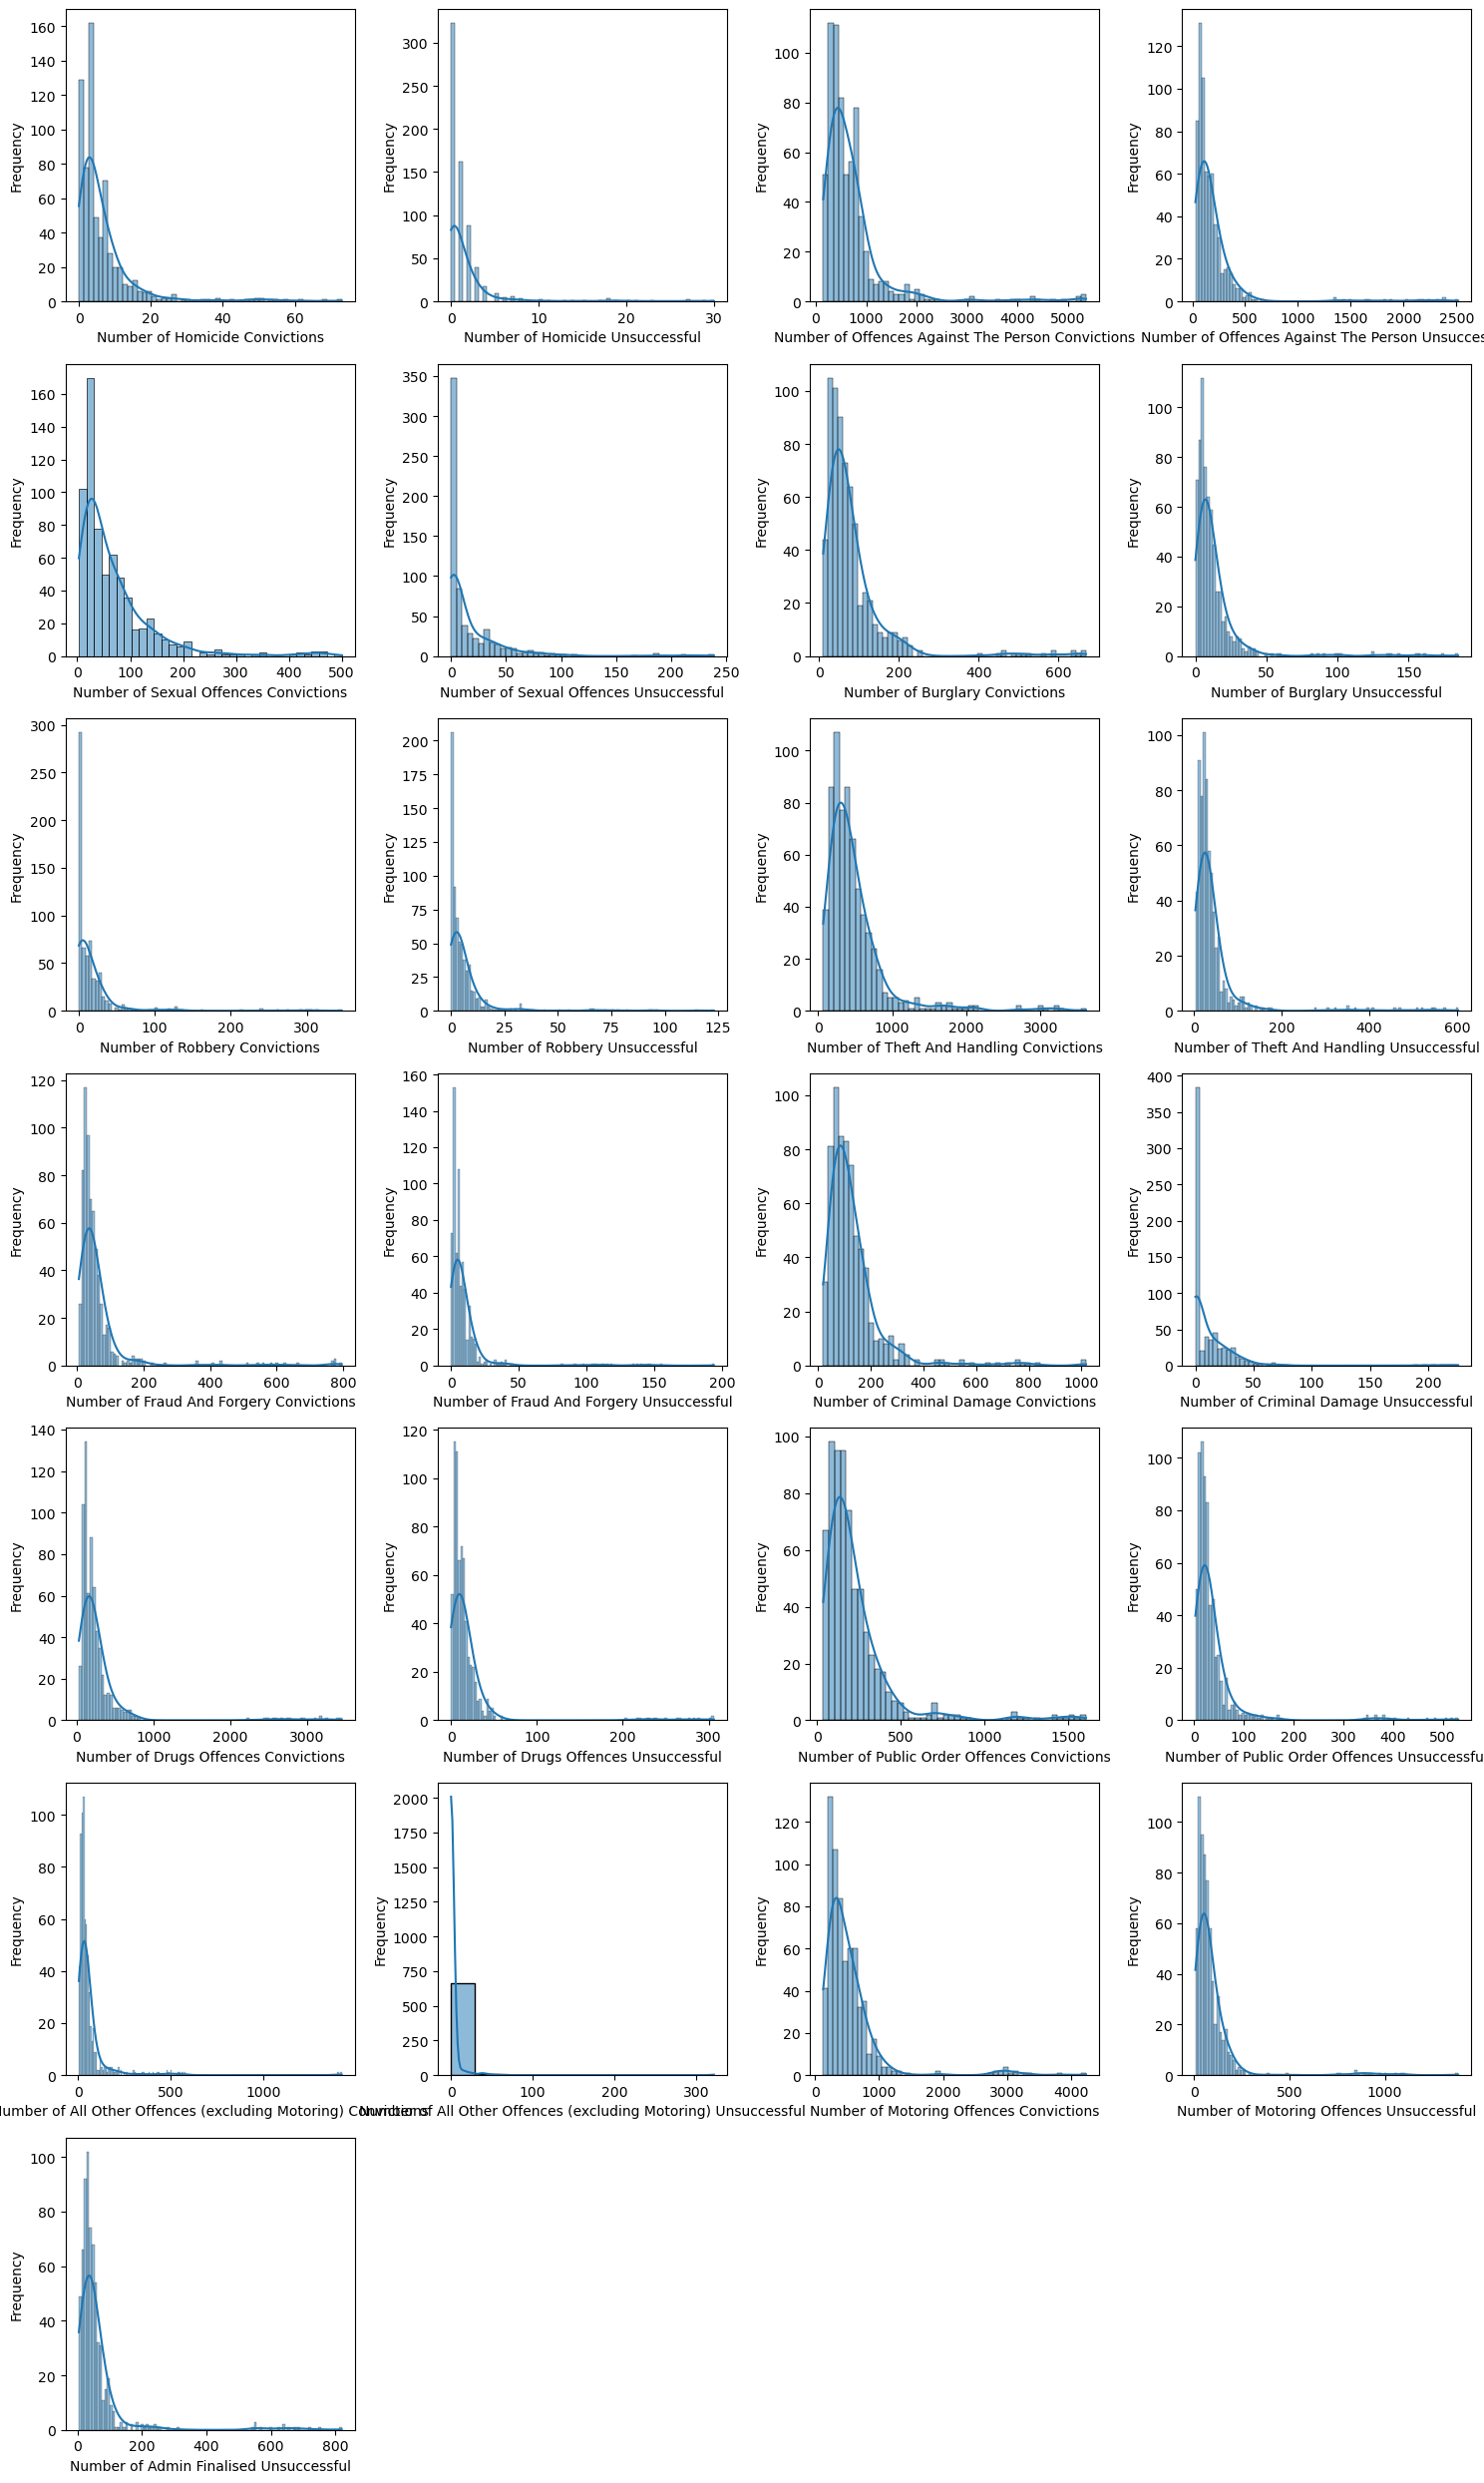

In [18]:
def plot_column_histograms(data, figsize=(15, 25), nrows=7, ncols=4):
    """
    Plots histograms for each numerical column in a dataframe.

    Args:
        data (pd.DataFrame): Dataframe containing the data.
        figsize (tuple, optional): Size of the figure. Defaults to (15, 25).
        nrows (int, optional): Number of rows for the subplots. Defaults to 7.
        ncols (int, optional): Number of columns for the subplots. Defaults to 4.
    """
    numerical_cols = data.select_dtypes(include=[np.number])  # Select numerical columns
    num_plots = len(numerical_cols.columns)

    # Adjust layout based on number of plots
    if num_plots <= nrows * ncols:
        rows, cols = nrows, ncols
    else:
        rows = int(np.ceil(num_plots / ncols))
        cols = ncols

    plt.figure(figsize=figsize)

    for i, col in enumerate(numerical_cols.columns, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(data[col], kde=True)
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


plot_column_histograms(CPS_Data_filtered_data)

The histograms reveal that all datasets exhibit right-skewed distributions, indicating that the majority of the data points cluster towards the lower end of the range, with fewer observations extending towards higher values. This pattern suggests that higher counts or values are relatively rare occurrences, meaning that the number of convicted and unconvicted offenses mostly show lower values.

### 2.1 Correlation analysis
To properly encode and scale the data for correlation analysis and further machine learning tasks, we follow these steps:
we use the python modeule sklearn library function StanderdScaler.
1. Encode Categorical Variables: Using one-hot encoding for categorical variables. This will create binary columns for each category, which prevents the introduction of an arbitrary order.

2. Scale Numerical Variables: Use standard scaling to ensure that numerical variables have a mean of 0 and a standard deviation of  This is important for many machine learning algorithms to perform well.

In [19]:
# installing the necessary library
!pip install sklearn



  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

C:\Users\User\AppData\Local\Temp\ipykernel_11276\4065107040.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPS_Data_filtered_data[col] = le.fit_transform(CPS_Data_filtered_data[col])
C:\Users\User\AppData\Local\Temp\ipykernel_11276\4065107040.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPS_Data_filtered_data[col] = le.fit_transform(CPS_Data_filtered_data[col])


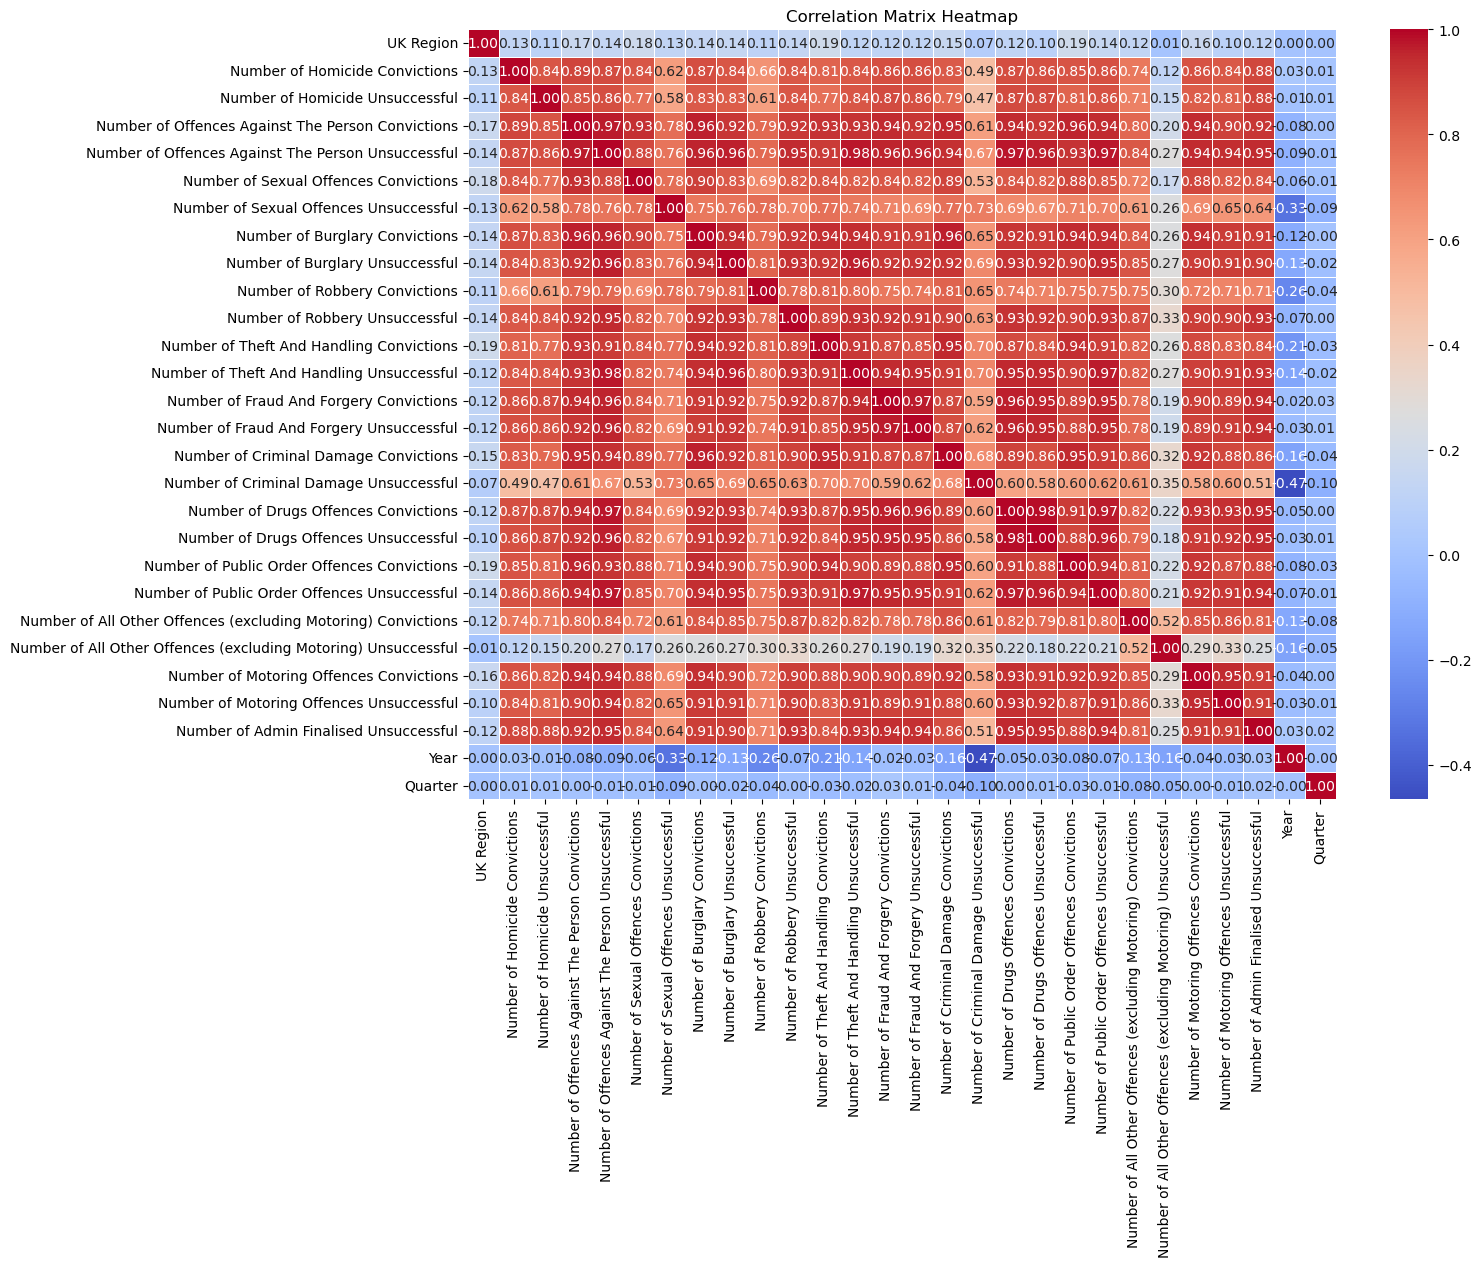

In [74]:

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Function to check if column name starts with 'Percentage'
def is_percentage_column(column_name):
    return column_name.startswith('Percentage')

# Filter out rows where 'UK Region' is 'National'
CPS_Data_filtered = CPS_Data_Merged[CPS_Data_Merged['UK Region'] != 'National']

# Identify percentage columns
percentage_columns = [col for col in CPS_Data_filtered.columns if is_percentage_column(col)]

# Drop percentage columns but keep 'Year', 'UK Region', and 'Quarter'
columns_to_keep = [col for col in CPS_Data_filtered.columns if col not in percentage_columns]

# Filtered data with percentage columns removed
CPS_Data_filtered_data = CPS_Data_filtered[columns_to_keep]


#Initialize LabelEncoders for categorical columns
label_encoders = {}
categorical_columns = ['UK Region', 'Quarter']

# Encode categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    CPS_Data_filtered_data[col] = le.fit_transform(CPS_Data_filtered_data[col])
    label_encoders[col] = le


# Compute the correlation matrix
correlation_matrix = CPS_Data_filtered_data.corr()

# Plot the Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Given the significant correlations observed in the dataset, it is crucial to retain all features for further analysis. The correlation matrix reveals noteworthy relationships between various features, indicating their potential relevance in the analysis. Consequently, no features will be excluded based on correlation alone. The next step involves data preperation of Machine learning model Implementation

### 2.3 Data Preparation

o create the target column for our machine learning task, we will be performing a comparative analysis of the number of homicide convictions that were successful versus those that were not. Specifically, we will create a new column labeled 'Target' that will be based on the following logic.

When the number of successful convictions for homicides exceeds the number of unsuccessful ones, the row will be labeled as 'Greater'. Conversely, if the number of unsuccessful convictions is greater, the row will be labeled as 'Lesser'. We will then remove the homicide offense records from the data before applying encoding and making predictions. This process allows us to establish a clear and binary target variable, which is essential for training and evaluating our predictive models.

In [75]:
CPS_Data_filtered_data

,UK Region,Number of Homicide Convictions,Number of Homicide Unsuccessful,Number of Offences Against The Person Convictions,Number of Offences Against The Person Unsuccessful,Number of Sexual Offences Convictions,Number of Sexual Offences Unsuccessful,Number of Burglary Convictions,Number of Burglary Unsuccessful,Number of Robbery Convictions,...,Number of Drugs Offences Unsuccessful,Number of Public Order Offences Convictions,Number of Public Order Offences Unsuccessful,Number of All Other Offences (excluding Motoring) Convictions,Number of All Other Offences (excluding Motoring) Unsuccessful,Number of Motoring Offences Convictions,Number of Motoring Offences Unsuccessful,Number of Admin Finalised Unsuccessful,Year,Quarter
1,0,14,1,752,230,133,59,79,7,27,...,13,261,38,157,0,639,131,94,15,0
2,1,2,0,260,93,14,8,43,4,43,...,4,104,16,48,0,199,27,33,15,0
3,2,1,0,316,81,18,6,48,3,18,...,7,115,11,37,0,267,36,31,15,0
4,3,2,0,619,139,61,11,70,9,7,...,12,173,23,144,0,442,57,29,15,0
5,4,3,0,338,120,39,12,85,12,20,...,16,275,65,27,0,227,21,14,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,37,8,1,168,35,15,0,16,1,0,...,1,48,13,7,0,205,52,23,18,3
684,38,5,0,490,100,45,0,58,9,0,...,6,155,17,39,0,582,62,43,18,3
685,39,21,7,1801,387,146,0,187,34,0,...,51,755,146,154,0,894,78,238,18,3
686,40,10,1,1231,338,170,0,173,14,0,...,35,356,65,63,0,1209,392,153,18,3


In [76]:
# Create the target column based on the comparison
CPS_Data_filtered_data['Target'] = CPS_Data_filtered_data.apply(
    lambda row: 'lesser' if row['Number of Homicide Convictions'] > row['Number of Homicide Unsuccessful'] else 'Greater', axis=1
)

# Remove columns related to sexual offense convictions and unsuccessful attempts
columns_to_remove =['Number of Homicide Convictions', 'Number of Homicide Unsuccessful']
CPS_Data_filtered_data = CPS_Data_filtered_data.drop(columns=columns_to_remove)

# quick confirmation of changes
CPS_Data_filtered_data

C:\Users\User\AppData\Local\Temp\ipykernel_11276\1202515551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPS_Data_filtered_data['Target'] = CPS_Data_filtered_data.apply(


,UK Region,Number of Offences Against The Person Convictions,Number of Offences Against The Person Unsuccessful,Number of Sexual Offences Convictions,Number of Sexual Offences Unsuccessful,Number of Burglary Convictions,Number of Burglary Unsuccessful,Number of Robbery Convictions,Number of Robbery Unsuccessful,Number of Theft And Handling Convictions,...,Number of Public Order Offences Convictions,Number of Public Order Offences Unsuccessful,Number of All Other Offences (excluding Motoring) Convictions,Number of All Other Offences (excluding Motoring) Unsuccessful,Number of Motoring Offences Convictions,Number of Motoring Offences Unsuccessful,Number of Admin Finalised Unsuccessful,Year,Quarter,Target
1,0,752,230,133,59,79,7,27,4,784,...,261,38,157,0,639,131,94,15,0,lesser
2,1,260,93,14,8,43,4,43,2,225,...,104,16,48,0,199,27,33,15,0,lesser
3,2,316,81,18,6,48,3,18,8,244,...,115,11,37,0,267,36,31,15,0,lesser
4,3,619,139,61,11,70,9,7,3,518,...,173,23,144,0,442,57,29,15,0,lesser
5,4,338,120,39,12,85,12,20,1,819,...,275,65,27,0,227,21,14,15,0,lesser
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,37,168,35,15,0,16,1,0,0,71,...,48,13,7,0,205,52,23,18,3,lesser
684,38,490,100,45,0,58,9,0,2,329,...,155,17,39,0,582,62,43,18,3,lesser
685,39,1801,387,146,0,187,34,0,28,1225,...,755,146,154,0,894,78,238,18,3,lesser
686,40,1231,338,170,0,173,14,0,17,691,...,356,65,63,0,1209,392,153,18,3,lesser


Before proceeding to the development of machine learning models, it is essential to undertake several data preparation tasks. The initial step involves separating the features from the target column.

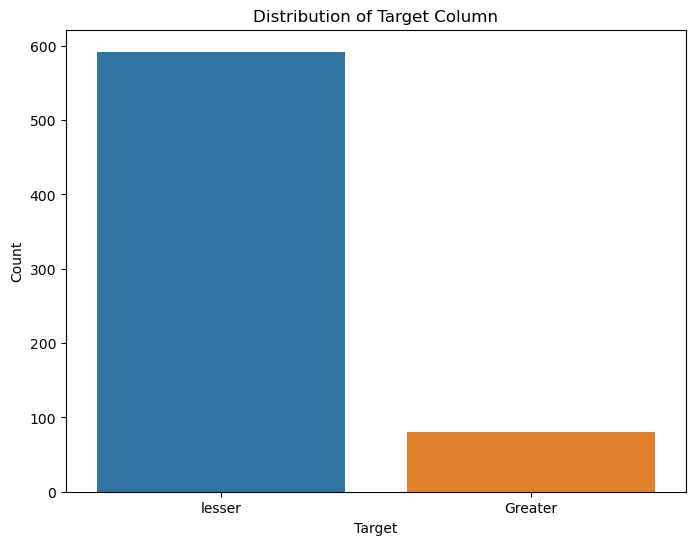

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a bar plot for the 'target' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=CPS_Data_filtered_data)
plt.title('Distribution of Target Column')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [79]:
# Count the number of unique values in the 'target' column
target_counts = CPS_Data_filtered_data['Target'].value_counts()

# Print the counts
print("Unique values in the 'target' column and their counts:")
print(target_counts)


Unique values in the 'target' column and their counts:
Target
lesser     592
Greater     80
Name: count, dtype: int64


In [80]:
# We label the two values in the 'Target' column as 1 and 0

# Define the mapping
value_to_label = {'Greater': 1, 'lesser': 0}


# Apply the mapping to the 'Target' column
CPS_Data_filtered_data['Target'] = CPS_Data_filtered_data['Target'].map(value_to_label)

# Verify the changes
print(CPS_Data_filtered_data['Target'].value_counts())

Target
0    592
1     80
Name: count, dtype: int64


In the target column of our dataset, we observe a distribution with two unique values: 'Lesser' and 'Greater'. Specifically, there are 592 instances where the number of unsuccessful homicide convictions exceeds the number of successful convictions, labeled as 'Lesser'. In contrast, there are 80 instances where the number of successful homicide convictions surpasses the number of unsuccessful convictions, labeled as 'Greater'. This distribution indicates an imbalanced dataset, with a significantly higher number of 'Lesser' labels compared to 'Greater' labels. 

In [81]:
# Assume CPS_Data_Merged is your dataset and target column is 'Target'

X = CPS_Data_filtered_data.drop(columns=['Target'])
y = CPS_Data_filtered_data['Target']

The dataset is split into 70% for training and 30% for testing while maintaining the same class distribution in both subsets.

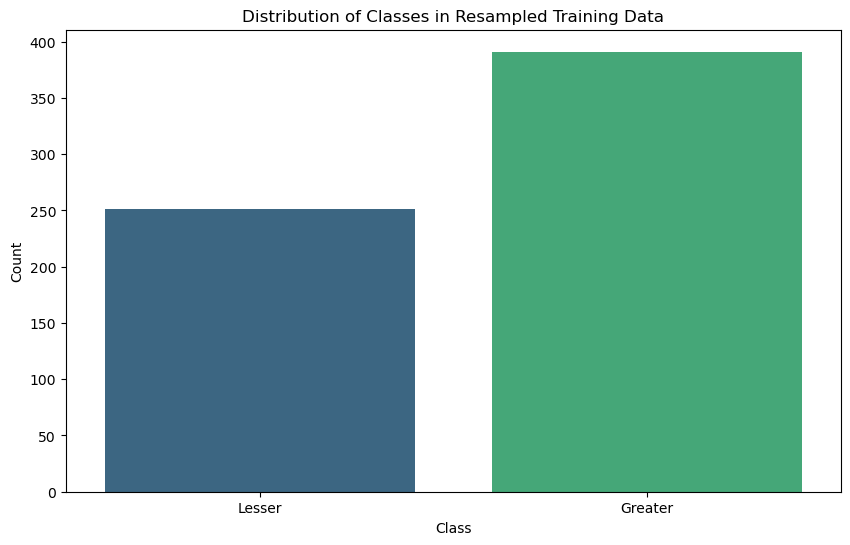

In [82]:
# Import necessary libraries
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTEENN to the training data
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Plot the distribution of classes in the resampled training data
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_resampled, palette='viridis')
plt.title('Distribution of Classes in Resampled Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Lesser', 'Greater'])
plt.show()

Given the observed imbalance in our target column, with 592 instances labeled as 'Lesser' and only 80 labeled as 'Greater', stratified sampling is employed to ensure that the proportions of these classes are maintained in both the training and test sets. This approach preserves the original class distribution, allowing for a more accurate and fair evaluation of our model’s performance across both classes.

### 3.0 Model training, evaluation and testing

We'll start by training different machine learning models to predict the 'Target' column. We'll use some common classifiers, such as  Random Forest, and XGBoost then we proceed with more deeper learning models such as MLP (Multi-Layer Perceptron) and LSTM(Long and Short Term Memory).

After training the models, we'll evaluate their performance using various metrics such as accuracy, precision, recall, F1 score, and the confusion matrix. This will help us understand how well each model is performing, particularly given the class imbalance.

In [78]:
# installing necessary libraries
# Install the necessary libraries
!pip install pandas numpy scikit-learn seaborn matplotlib xgboost keras tensorflow

  Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl (14.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\User\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [94]:
import pandas as pd # data manipulation
import numpy as np # numerical operations
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # plotting
from sklearn.model_selection import train_test_split # model evaluation
from sklearn.ensemble import RandomForestClassifier # ensemble learning
from sklearn.preprocessing import StandardScaler # feature scaling
from sklearn.metrics import classification_report, confusion_matrix,  accuracy_score, precision_score, recall_score, f1_score # performance metrics
from sklearn.neural_network import MLPClassifier # neural network
import xgboost as xgb # gradient boosting
from keras.models import Sequential # deep learning model
from keras.layers import Dense, LSTM # network layers
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.preprocessing.sequence import pad_sequences


1. RANDOM FOREST MODEL 

In [84]:

# Define Random Forest model and hyperparameter tuning
rf_model = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_grid,
                                       n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train_resampled, y_train_resampled)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

In [85]:
# Print the best parameters for Random Forest
print("Best parameters for Random Forest:")
print(rf_random_search.best_params_)

Best parameters for Random Forest:
{'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 10}


In [86]:
# Initializing and Training Random Forest model with best hyperparameters
rf_best_model = rf_random_search.best_estimator_
rf_predictions = rf_best_model.predict(X_test)

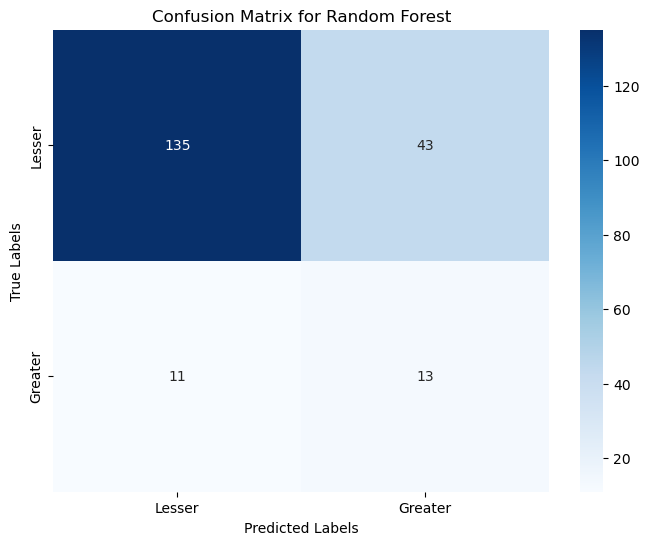


Random Forest Model Evaluation:
Accuracy Score: 0.7326732673267327
Precision Score: 0.23214285714285715
Recall Score: 0.5416666666666666
F1 Score: 0.325
[[135  43]
 [ 11  13]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       178
           1       0.23      0.54      0.33        24

    accuracy                           0.73       202
   macro avg       0.58      0.65      0.58       202
weighted avg       0.84      0.73      0.77       202



In [92]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    # Map integer labels to string labels
    label_mapping = {0: 'Lesser', 1: 'Greater'}
    y_true_mapped = [label_mapping[label] for label in y_true]
    y_pred_mapped = [label_mapping[label] for label in y_pred]
    
    # Create the confusion matrix
    cm = confusion_matrix(y_true_mapped, y_pred_mapped, labels=['Lesser', 'Greater'])
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lesser', 'Greater'], yticklabels=['Lesser', 'Greater'])
    plt.title(f'Confusion Matrix for {title}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    
plot_confusion_matrix(y_test, rf_predictions, 'Random Forest')

# Print Random Forest model evaluation metrics
print("\nRandom Forest Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, rf_predictions))
print("Precision Score:", precision_score(y_test, rf_predictions))
print("Recall Score:", recall_score(y_test, rf_predictions))
print("F1 Score:", f1_score(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

2. XGBOOST MODEL 

In [95]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


# Define XGBoost model and hyperparameter tuning
xgb_model = XGBClassifier()
xgb_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_lambda': [0.5, 1.0, 1.5, 2.0]
}

xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_grid,
                                       n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train_resampled, y_train_resampled)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4,
                                                      0.5],
                                        'reg_lambda': [0.5, 1.0, 1.5, 2.0],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, verbose=2)

In [96]:
# Print the best parameters
print("Best parameters found: ", xgb_random_search.best_params_)

Best parameters found:  {'subsample': 0.8, 'reg_lambda': 2.0, 'reg_alpha': 0.2, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 0.5, 'colsample_bytree': 0.8}


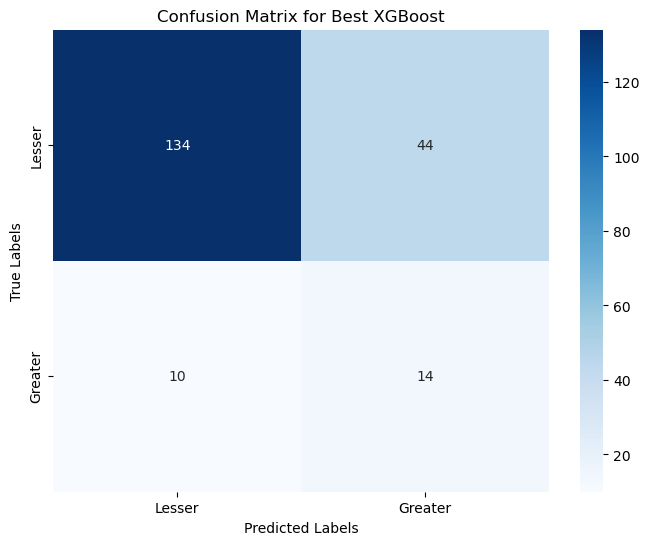


 XGBoost Model Evaluation:
Accuracy Score: 0.7326732673267327
Precision Score: 0.2413793103448276
Recall Score: 0.5833333333333334
F1 Score: 0.34146341463414637
[[134  44]
 [ 10  14]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       178
           1       0.24      0.58      0.34        24

    accuracy                           0.73       202
   macro avg       0.59      0.67      0.59       202
weighted avg       0.85      0.73      0.77       202



In [120]:
# Evaluate the model with the best parameters
best_xgb = xgb_random_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_best_xgb, 'Best XGBoost')

# Print Random Forest model evaluation metrics
print("\n XGBoost Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_best_xgb))
print("Precision Score:", precision_score(y_test, y_pred_best_xgb))
print("Recall Score:", recall_score(y_test, y_pred_best_xgb))
print("F1 Score:", f1_score(y_test, y_pred_best_xgb))

print(confusion_matrix(y_test, y_pred_best_xgb))
print(classification_report(y_test, y_pred_best_xgb))

3. MLP (Multi-Layer Perceptron) MODEL

In [99]:
# Define MLP model and hyperparameter tuning
mlp_model = MLPClassifier(max_iter=100)
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (50, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive']
}

mlp_random_search = RandomizedSearchCV(estimator=mlp_model, param_distributions=mlp_param_grid,
                                       n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
mlp_random_search.fit(X_train_resampled, y_train_resampled)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:412: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


RandomizedSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (50, 50),
                                                               (100, 100),
                                                               (50, 100)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam']},
                   random_state=42, verbose=2)

In [101]:
# Print the best parameters
print("Best parameters found: ", mlp_random_search.best_params_)

Best parameters found:  {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100), 'alpha': 0.01, 'activation': 'tanh'}


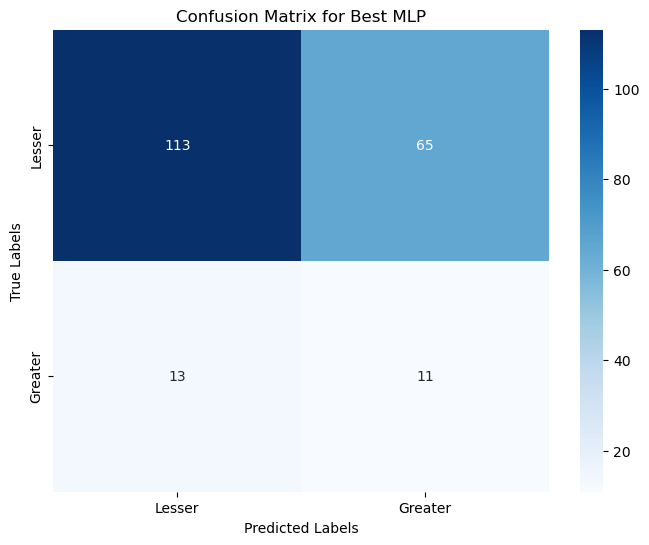


 MLP Model Evaluation:
Accuracy Score: 0.6138613861386139
Precision Score: 0.14473684210526316
Recall Score: 0.4583333333333333
F1 Score: 0.22
[[113  65]
 [ 13  11]]
              precision    recall  f1-score   support

           0       0.90      0.63      0.74       178
           1       0.14      0.46      0.22        24

    accuracy                           0.61       202
   macro avg       0.52      0.55      0.48       202
weighted avg       0.81      0.61      0.68       202



In [121]:
# Evaluate the model with the best parameters
best_mlp = mlp_random_search.best_estimator_
y_pred_best_mlp = best_mlp.predict(X_test)


# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_best_mlp, 'Best MLP')

# Print Random Forest model evaluation metrics
print("\n MLP Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_best_mlp))
print("Precision Score:", precision_score(y_test, y_pred_best_mlp))
print("Recall Score:", recall_score(y_test, y_pred_best_mlp))
print("F1 Score:", f1_score(y_test, y_pred_best_mlp))

print(confusion_matrix(y_test, y_pred_best_mlp))
print(classification_report(y_test, y_pred_best_mlp))

4. LSTM(Long and Short Term Memory)

In [104]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [105]:
# Function to create the LSTM model
def create_lstm_model(units=50, activation='relu', dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model so it can be used by scikit-learn
lstm_model = KerasClassifier(build_fn=create_lstm_model, verbose=2)

# Define the hyperparameter grid
lstm_param_grid = {
    'units': [50, 100, 150],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30]
}

# Set up the RandomizedSearchCV
lstm_random_search = RandomizedSearchCV(estimator=lstm_model, param_distributions=lstm_param_grid,
                                        n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

C:\Users\User\AppData\Local\Temp\ipykernel_11276\1970989521.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasClassifier(build_fn=create_lstm_model, verbose=2)


In [108]:

print("Training LSTM...")
# Reshape data for LSTM MODEL
X_train_resampled_lstm = np.reshape(X_train_resampled.values, (X_train_resampled.shape[0], 1, X_train_resampled.shape[1]))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))


Training LSTM...
Epoch 1/10
21/21 [==============================] - 2s 3ms/step - loss: 1.9906 - accuracy: 0.5514
Epoch 2/10
21/21 [==============================] - 0s 5ms/step - loss: 1.2251 - accuracy: 0.6604
Epoch 3/10
21/21 [==============================] - 0s 4ms/step - loss: 0.8703 - accuracy: 0.7399
Epoch 4/10
21/21 [==============================] - 0s 4ms/step - loss: 0.6555 - accuracy: 0.7352
Epoch 5/10
21/21 [==============================] - 0s 5ms/step - loss: 0.5495 - accuracy: 0.7835
Epoch 6/10
21/21 [==============================] - 0s 5ms/step - loss: 0.5250 - accuracy: 0.7866
Epoch 7/10
21/21 [==============================] - 0s 5ms/step - loss: 0.4826 - accuracy: 0.7850
Epoch 8/10
21/21 [==============================] - 0s 4ms/step - loss: 0.4568 - accuracy: 0.8146
Epoch 9/10
21/21 [==============================] - 0s 5ms/step - loss: 0.5897 - accuracy: 0.7461
Epoch 10/10
21/21 [==============================] - 0s 4ms/step - loss: 0.5603 - accuracy: 0.7492


In [115]:

# Initializing the LSTM model input_shape is set to the shape of the training data
lstm = Sequential()
lstm.add(LSTM(units=50, activation='relu', input_shape=(X_train_resampled_lstm.shape[1], X_train_resampled_lstm.shape[2])))
lstm.add(Dense(1, activation='sigmoid'))

# Compile the LSTM model with Adam optimizer and binary cross-entropy loss
# Accuracy is used as a performance metric
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm.fit(X_train_resampled_lstm, y_train_resampled, epochs=10, batch_size=32, verbose=1)



Epoch 1/10
21/21 [==============================] - 2s 3ms/step - loss: 6.2541 - accuracy: 0.5857
Epoch 2/10
21/21 [==============================] - 0s 9ms/step - loss: 2.3963 - accuracy: 0.6308
Epoch 3/10
21/21 [==============================] - 0s 5ms/step - loss: 1.3020 - accuracy: 0.6449
Epoch 4/10
21/21 [==============================] - 0s 4ms/step - loss: 1.0283 - accuracy: 0.6682
Epoch 5/10
21/21 [==============================] - 0s 4ms/step - loss: 0.8508 - accuracy: 0.6636
Epoch 6/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6769 - accuracy: 0.7134
Epoch 7/10
21/21 [==============================] - 0s 4ms/step - loss: 0.5853 - accuracy: 0.7290
Epoch 8/10
21/21 [==============================] - 0s 4ms/step - loss: 0.5466 - accuracy: 0.7414
Epoch 9/10
21/21 [==============================] - 0s 8ms/step - loss: 0.5107 - accuracy: 0.7679
Epoch 10/10
21/21 [==============================] - 0s 4ms/step - loss: 0.5122 - accuracy: 0.7757


In [116]:
# Make predictions with the best LSTM model on the test data
y_pred_lstm = lstm.predict(X_test_lstm)

# Convert predicted probabilities to binary outcomes (0 or 1)
# Predictions greater than 0.5 are considered as class 1, otherwise class 0
y_pred_lstm = np.where(y_pred_lstm > 0.5, 1, 0).flatten()

7/7 [==============================] - 0s 3ms/step


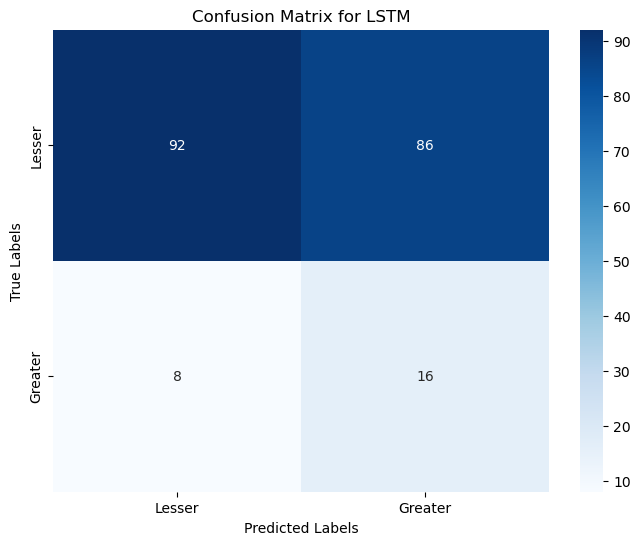


 LSTM Model Evaluation:
Accuracy Score: 0.5346534653465347
Precision Score: 0.1568627450980392
Recall Score: 0.6666666666666666
F1 Score: 0.25396825396825395
[[92 86]
 [ 8 16]]
              precision    recall  f1-score   support

           0       0.92      0.52      0.66       178
           1       0.16      0.67      0.25        24

    accuracy                           0.53       202
   macro avg       0.54      0.59      0.46       202
weighted avg       0.83      0.53      0.61       202



In [122]:
 # Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_lstm, 'LSTM')

# Print Random Forest model evaluation metrics
print("\n LSTM Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_lstm))
print("Precision Score:", precision_score(y_test, y_pred_lstm))
print("Recall Score:", recall_score(y_test, y_pred_lstm))
print("F1 Score:", f1_score(y_test, y_pred_lstm))

print(confusion_matrix(y_test, y_pred_lstm))
print(classification_report(y_test, y_pred_lstm))

In [150]:
# Calculate metrics for each model
# Accuracy Scores
accuracy_scores = [
    accuracy_score(y_test, rf_predictions), accuracy_score(y_test, y_pred_best_xgb),
    accuracy_score(y_test, y_pred_best_mlp), accuracy_score(y_test, y_pred_lstm)
]

# Precision Scores
precision_scores = [
    precision_score(y_test, rf_predictions),  precision_score(y_test, y_pred_best_xgb),
    precision_score(y_test, y_pred_best_mlp),  precision_score(y_test, y_pred_lstm)
]

# Recall Scores
recall_scores = [
    recall_score(y_test, rf_predictions),  recall_score(y_test, y_pred_best_xgb),
    recall_score(y_test, y_pred_best_mlp),  recall_score(y_test, y_pred_lstm)
]

# F1 Scores
f1_scores = [
    f1_score(y_test, rf_predictions),  f1_score(y_test, y_pred_best_xgb),
    f1_score(y_test, y_pred_best_mlp),  f1_score(y_test, y_pred_lstm)
]

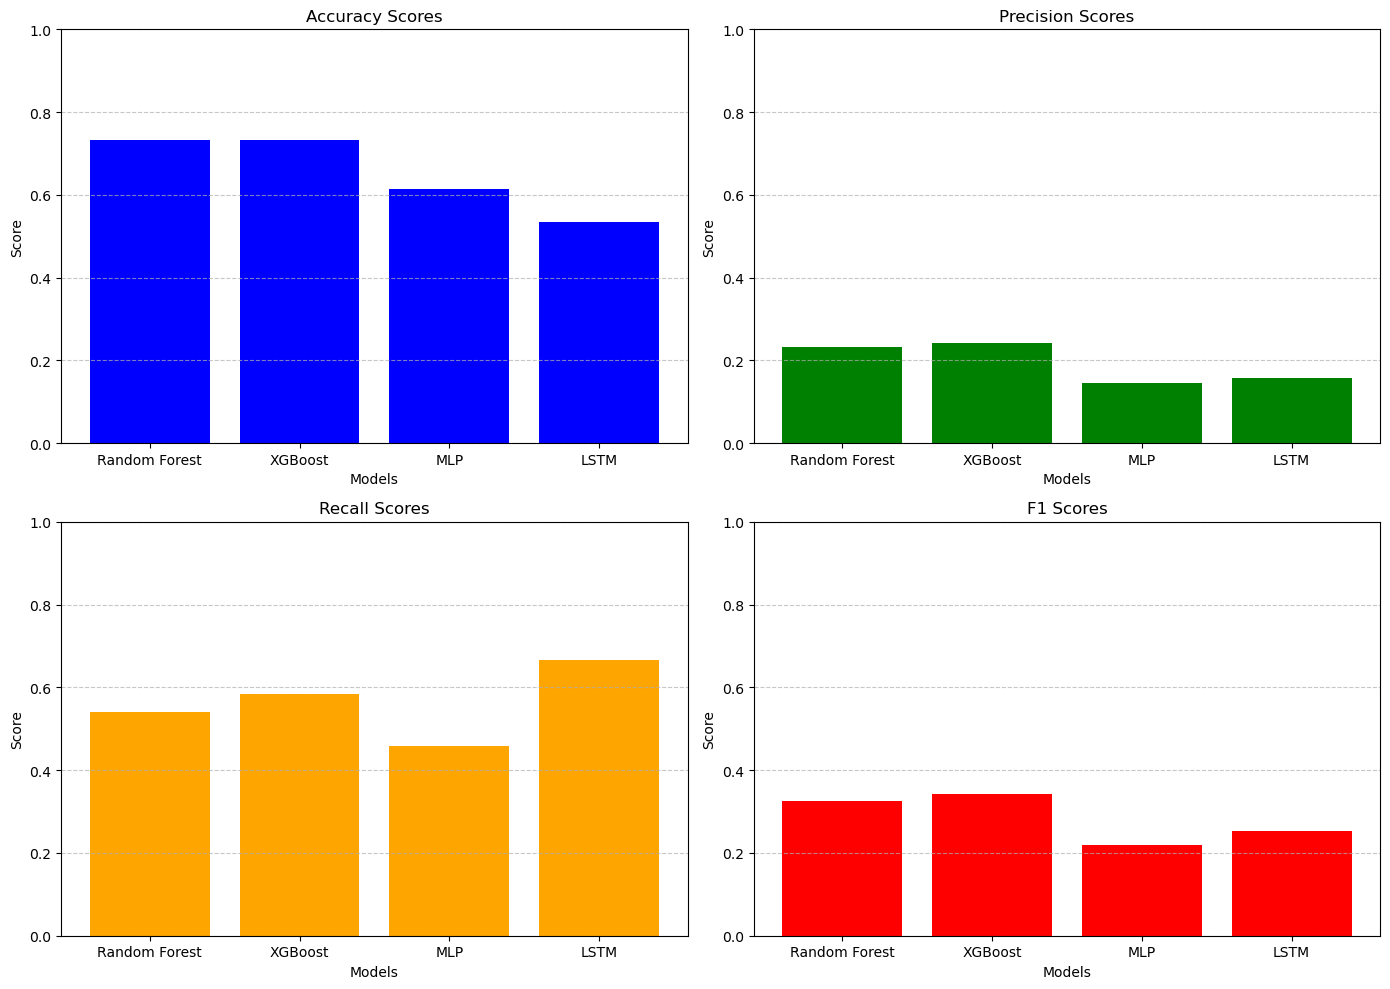

In [151]:

# Create subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Accuracy Scores
axs[0, 0].bar(models, accuracy_scores, color='blue')
axs[0, 0].set_title('Accuracy Scores')
axs[0, 0].set_xlabel('Models')
axs[0, 0].set_ylabel('Score')
axs[0, 0].set_ylim(0, 1)
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Precision Scores
axs[0, 1].bar(models, precision_scores, color='green')
axs[0, 1].set_title('Precision Scores')
axs[0, 1].set_xlabel('Models')
axs[0, 1].set_ylabel('Score')
axs[0, 1].set_ylim(0, 1)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Recall Scores
axs[1, 0].bar(models, recall_scores, color='orange')
axs[1, 0].set_title('Recall Scores')
axs[1, 0].set_xlabel('Models')
axs[1, 0].set_ylabel('Score')
axs[1, 0].set_ylim(0, 1)
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot F1 Scores
axs[1, 1].bar(models, f1_scores, color='red')
axs[1, 1].set_title('F1 Scores')
axs[1, 1].set_xlabel('Models')
axs[1, 1].set_ylabel('Score')
axs[1, 1].set_ylim(0, 1)
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

### 4.0  DISSCUSIONS

1.Accuracy

Random Forest and XGBoost: Both models achieved the highest accuracy score of approximately 73.27%. This suggests that these models are relatively effective in predicting the overall outcomes when compared to the other models. The accuracy indicates that these models perform well in distinguishing between the two classes, especially when the dataset is imbalanced.

MLP: The Multi-Layer Perceptron (MLP) model's accuracy is lower at 61.39%. This decrease might be due to the model's inability to capture the complex patterns in the data or its sensitivity to the imbalanced classes.

LSTM: The Long Short-Term Memory (LSTM) model performed the least well with an accuracy of 53.47%. This lower accuracy could be attributed to the model's architecture, which might not be well-suited for the specific characteristics of the dataset, especially if the data lacks temporal dependencies.

2.Precision


Random Forest and XGBoost: Both models exhibit a low precision score of 0.2414 for the positive class ('Greater'). Precision measures the proportion of true positive predictions among all positive predictions made. This low precision indicates that while the models correctly identify some positive cases, they also misclassify many negatives as positives.

MLP: The precision score of 0.1447 is even lower, suggesting that the MLP model struggles more with correctly identifying positive cases compared to the Random Forest and XGBoost models.

LSTM: The precision of the LSTM model is 0.1569, which is slightly higher than the MLP but still low. This suggests that the LSTM model also has difficulty in accurately predicting positive cases, which could be due to its architecture not effectively handling the imbalanced data.

3.Recall

Random Forest and XGBoost: Both models have a recall score of 0.5833, indicating that they are reasonably good at identifying positive cases among all actual positive cases. This implies that these models can effectively capture a significant portion of the minority class instances.

MLP: The recall score of 0.4583 shows that the MLP model is less effective in identifying positive cases compared to Random Forest and XGBoost. This reduced recall might be due to its inability to capture the nuances of the data or poor handling of class imbalance.

LSTM: The LSTM model has the highest recall score of 0.6667, which suggests that it is better at identifying positive cases than the other models. However, this comes at the cost of lower precision, indicating that while it identifies more positive cases, it also includes more false positives.

4.F1 Score

Random Forest and XGBoost: Both models have an F1 score of approximately 0.3415, which is a balance between precision and recall. This indicates that they have a moderate performance in handling the trade-off between precision and recall, providing a reasonable measure of overall model performance.

MLP: The F1 score of 0.2200 is the lowest among the models, reflecting poor performance in balancing precision and recall. This suggests that the MLP model struggles to effectively manage the trade-off between false positives and false negatives.

LSTM: The F1 score of 0.2539 is higher than the MLP but lower than the Random Forest and XGBoost models. This indicates that while the LSTM model performs better than MLP in balancing precision and recall, it still falls short compared to the ensemble methods.

Strategic Implications
Random Forest and XGBoost: These models are strong candidates for this task due to their high accuracy and balanced recall and precision. Their ensemble nature helps in managing class imbalance and capturing complex patterns. They are likely the preferred models for this task, providing a good balance between identifying positive cases and managing false positives.The lower performance of the MLP model suggests that it might not be well-suited for this particular dataset, possibly due to its sensitivity to class imbalance or the need for more extensive hyperparameter tuning. It may require additional adjustments or preprocessing to improve its performance.The LSTM model shows promise in recall, indicating that it can identify positive cases more effectively. However, its lower precision suggests that it also misclassifies many negative cases as positive. This trade-off between recall and precision should be carefully considered based on the specific requirements of the task. If identifying all possible positive cases is critical, the LSTM might be worth exploring further.

In summary, Random Forest and XGBoost generally perform better across most metrics compared to MLP and LSTM, making them preferable for tasks where class imbalance is a concern and balanced performance is crucial. However, the choice of model should align with the specific goals of the task, such as whether precision or recall is more critical.